<a href="https://colab.research.google.com/github/Tanjib-Rafi/Spam-SMS-Detection/blob/main/SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [936]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [937]:
import numpy as np
import pandas as pd
import sklearn
from subprocess import check_output


In [938]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/SPAMtextmessage.csv',encoding="ISO-8859-1")

In [939]:
dataset

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [940]:
dataset.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [941]:
dataset['Category'] = dataset['Category'].replace(['ham','spam'],[0,1])
dataset.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [942]:
X=dataset.Message.values
y=dataset.Category.values

In [943]:
X

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [944]:
dataset['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [945]:
dataset.drop_duplicates(inplace=True)

In [946]:
dataset['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

In [947]:
dataset

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [948]:
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#flat_array = X_train.flatten()
cv = CountVectorizer()
# e = cv.fit_transform(X_train.ravel())
e = cv.fit_transform(X).toarray()
# e.toarray()

In [949]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(e, y, test_size = 0.33)

In [950]:
X_train.shape

(3733, 8745)

In [951]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [952]:
model = Sequential()
model.add(Dense(12, input_dim=8745, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [953]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 12)                104952    
                                                                 
 dense_103 (Dense)           (None, 8)                 104       
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 105,065
Trainable params: 105,065
Non-trainable params: 0
_________________________________________________________________


In [954]:
# import scipy
# ee = scipy.sort_indices(e)
# eee = scipy.sort_indices(y_train)
y

array([0, 0, 1, ..., 0, 0, 0])

In [955]:
history = model.fit(X_train, y_train, epochs = 7)

Epoch 1/7
117/117 [==============================] - 2s 7ms/step - loss: 0.4272 - accuracy: 0.9078
Epoch 2/7
117/117 [==============================] - 1s 6ms/step - loss: 0.1182 - accuracy: 0.9837
Epoch 3/7
117/117 [==============================] - 1s 6ms/step - loss: 0.0455 - accuracy: 0.9936
Epoch 4/7
117/117 [==============================] - 1s 7ms/step - loss: 0.0215 - accuracy: 0.9968
Epoch 5/7
117/117 [==============================] - 1s 7ms/step - loss: 0.0114 - accuracy: 0.9992
Epoch 6/7
117/117 [==============================] - 1s 6ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 7/7
117/117 [==============================] - 1s 7ms/step - loss: 0.0050 - accuracy: 0.9997


In [956]:
acd = history.history['accuracy']
loss = history.history['loss']

In [957]:
emails=[ 'you win an iphone fillup the survey', #1
        'you are good', #0
        'you have been selected to receive a prize .You  have 24 hours to claim it', #1
        'we have detected fraudulent activity in your account.Please contact us for further information', #1
        'Free money!!!', #1
        "Hi Kim, Please let me know if you need any further information. Thanks"] #0

In [958]:
c = cv.transform(emails)
d=model.predict(c)
print(np.round(d))

[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]]


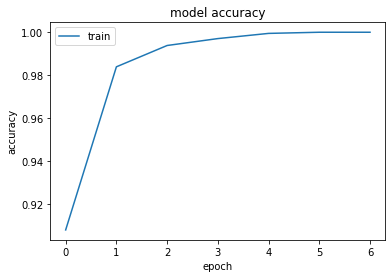

<Figure size 432x288 with 0 Axes>

In [959]:
from matplotlib import pyplot as plt
plt.plot(acd)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('accuracy_curve.png')

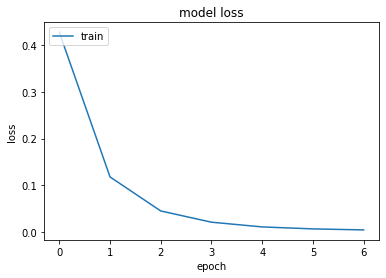

<Figure size 432x288 with 0 Axes>

In [960]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc = 'upper left')
plt.show()
plt.savefig('loss_curve.png')

In [961]:
history_test = model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 4ms/step - loss: 0.0744 - accuracy: 0.9826


In [962]:
history_test

[0.07444463670253754, 0.9825992584228516]